## 分布函数 ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

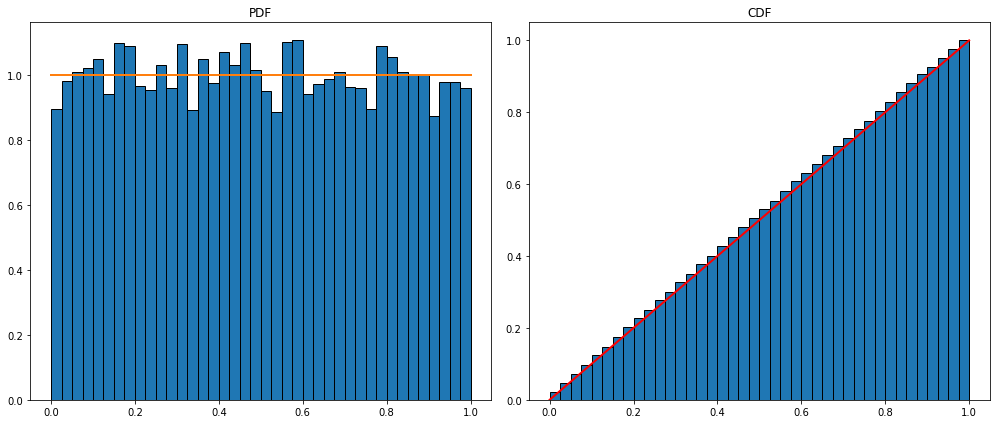

In [2]:
# 均匀分布

a, b = 0, 1
fx = np.random.uniform(0, 1, 10000)
n_bins = 40

fig = plt.figure(1, (14,6))
ax1 = fig.add_subplot(1, 2, 1)
# edgecolor指定bin的边框： https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
# bins返回的是x轴bin的坐标列表
n, bins, ignored = ax1.hist(fx, n_bins, normed=True, edgecolor='k')
pdfs = [1/(b-a) for bin in bins]
ax1.plot(bins, pdfs, lw=2.0)
ax1.set_title('PDF')

ax2 = fig.add_subplot(1, 2, 2)
n, bins, ignored = ax2.hist(fx, n_bins, normed=True, cumulative=True, edgecolor='k')
cdfs = [(bin-a)/(b-a) for bin in bins]
ax2.plot(bins, cdfs, 'r', lw=2.0)
ax2.set_title('CDF')

fig.tight_layout()
plt.show()

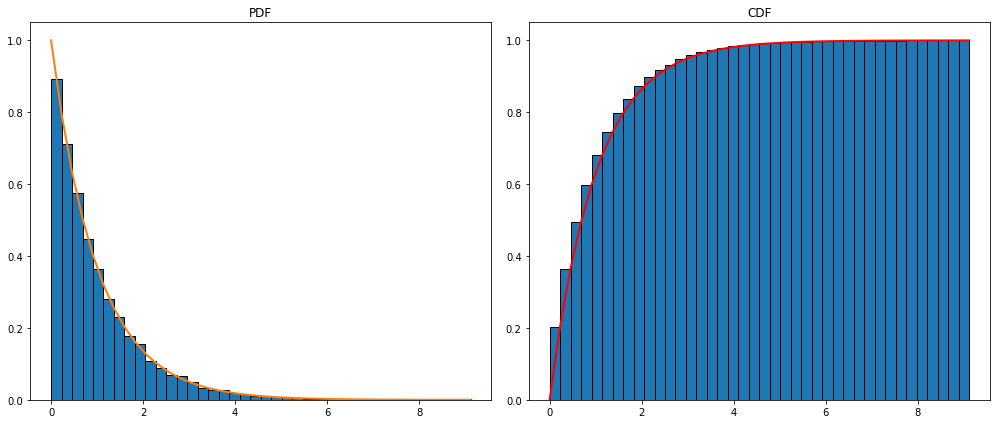

In [3]:
# 指数分布

lam = 1
fx = np.random.exponential(lam, 10000)
n_bins = 40

fig = plt.figure(1, (14,6))
ax1 = fig.add_subplot(1, 2, 1)
n, bins, ignored = ax1.hist(fx, n_bins, normed=True, edgecolor='k')
ax1.plot(bins, lam*np.exp(-lam*bins), lw=2.0)
ax1.set_title('PDF')

ax2 = fig.add_subplot(1, 2, 2)
n, bins, ignored = ax2.hist(fx, n_bins, normed=True, cumulative=True, edgecolor='k')
ax2.plot(bins, 1-np.exp(-lam*bins), 'r', lw=2.0)
ax2.set_title('CDF')

fig.tight_layout()
plt.show()

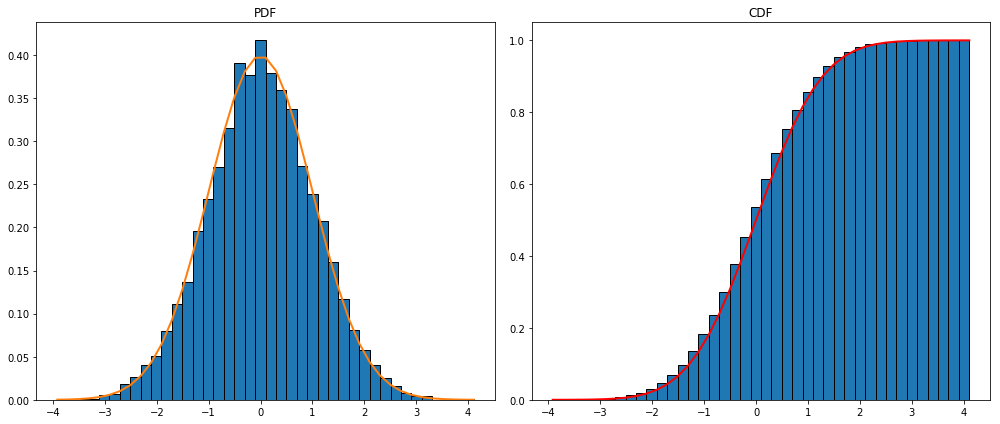

In [4]:
# 正态分布

mu, sigma = 0, 1
fx = np.random.normal(mu, sigma, 10000)
n_bins = 40

fig = plt.figure(1, (14,6))
ax1 = fig.add_subplot(1, 2, 1)
n, bins, ignored = ax1.hist(fx, n_bins, normed=True, edgecolor='k')
ax1.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), lw=2.0)
ax1.set_title('PDF')

ax2 = fig.add_subplot(1, 2, 2)
n, bins, ignored = ax2.hist(fx, n_bins, normed=True, cumulative=True, edgecolor='k')
cdfs = [1/2*(1+math.erf((bin-mu)/(sigma*math.sqrt(2)))) for bin in bins]
ax2.plot(bins, cdfs, 'r', lw=2.0)
ax2.set_title('CDF')

fig.tight_layout()
plt.show()

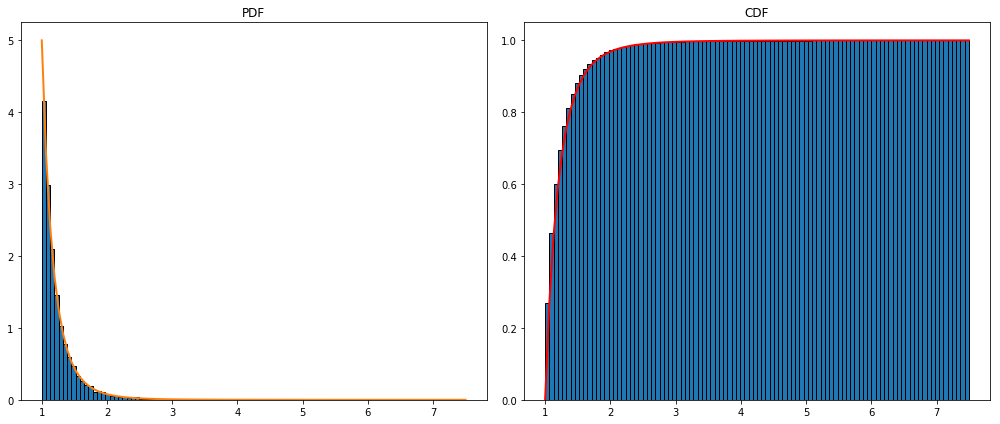

In [5]:
# 帕累托分布

alpha, xm = 5, 1
fx = (np.random.pareto(alpha, 10000) + 1) * xm
n_bins = 100

fig = plt.figure(1, (14,6))
ax1 = fig.add_subplot(1, 2, 1)
n, bins, ignored = ax1.hist(fx, n_bins, normed=True, edgecolor='k')
ax1.plot(bins, alpha*xm**alpha/bins**(alpha+1), lw=2.0)
ax1.set_title('PDF')

ax2 = fig.add_subplot(1, 2, 2)
n, bins, ignored = ax2.hist(fx, n_bins, normed=True, cumulative=True, edgecolor='k')
cdfs = [1-(bin/xm)**(-alpha) for bin in bins]
ax2.plot(bins, cdfs, 'r', lw=2.0)
ax2.set_title('CDF')

fig.tight_layout()
plt.show()

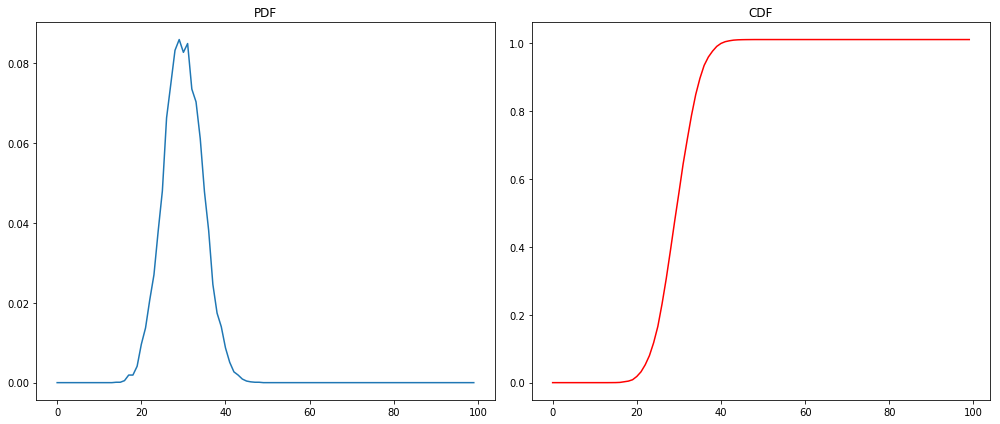

In [6]:
# 二项分布
# 服从二项分布的随机变量X表示在n个独立的是/非试验中成功的次数，其中每次试验的成功概率为p。
n, p = 100, 0.3
k = range(0,n)
size = 10000
pmf = []

for i in k:
    pmf.append(sum(np.random.binomial(n, p, size)==i) / size)

cdf = np.cumsum(pmf)

fig = plt.figure(1, (14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(k, pmf)
ax1.set_title('PDF')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(k, cdf, 'r')
ax2.set_title('CDF')

fig.tight_layout()
plt.show()

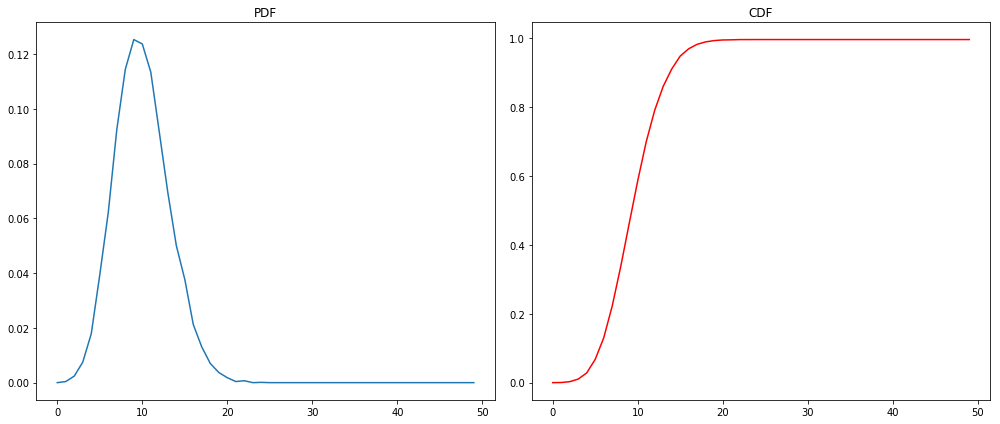

In [7]:
# 泊松分布
# 一个服从泊松分布的随机变量X，表示在具有比率参数λ的一段固定时间间隔内，事件发生的次数。参数λ告诉你该事件发生的比率。随机变量X的平均值和方差都是λ。

lam, n = 10, 50 
k = range(0, n)
size = 10000
pmf = []

for i in k:
    pmf.append(sum(np.random.poisson(lam, size)==i) / size)

cdf = np.cumsum(pmf)

fig = plt.figure(1, (14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(k, pmf)
ax1.set_title('PDF')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(k, cdf, 'r')
ax2.set_title('CDF')

fig.tight_layout()
plt.show()